# Задание

## Данные

В этой лабораторной работе будем работать с [датасетом](https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset), предназначенным для обучения алгоритма рекомендаций книг.

Для рекомендаций нам понадобятся таблицы `Books.csv` и `Ratings.scv`. Файл с рейтингами можно найти в папке с лабораторной работой на гитхабе. Файл с описаниями книг слишком большой, поэтому он располагается только по ссылке:
1. Файл с рейтингами (такой же, как в гитхабе): https://drive.google.com/file/d/1Hliaee7Y584-7lMoGeGjGabRRubzdoYn/view?usp=sharing
2. Файл с книгами:  https://drive.google.com/file/d/1JYpk5GTzK7GWT3mtDb9fNiwaVTzk8BBy/view?usp=sharing

In [12]:
import pandas as pd

In [13]:
!gdown 1Hliaee7Y584-7lMoGeGjGabRRubzdoYn
!gdown 1JYpk5GTzK7GWT3mtDb9fNiwaVTzk8BBy

Downloading...
From: https://drive.google.com/uc?id=1Hliaee7Y584-7lMoGeGjGabRRubzdoYn
To: /content/Ratings.csv
100% 22.6M/22.6M [00:00<00:00, 139MB/s]
Downloading...
From: https://drive.google.com/uc?id=1JYpk5GTzK7GWT3mtDb9fNiwaVTzk8BBy
To: /content/Books.csv
100% 73.3M/73.3M [00:00<00:00, 121MB/s]


Посмотрим на таблицу `Ratings`.

In [14]:
ratings = pd.read_csv("Ratings.csv")
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [15]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [16]:
ratings.describe().T

,count,mean,std,min,25%,50%,75%,max
User-ID,1149780.0,140386.395126,80562.277718,2.0,70345.0,141010.0,211028.0,278854.0
Book-Rating,1149780.0,2.866950,3.854184,0.0,0.0,0.0,7.0,10.0


Как распределяются рейтинги?

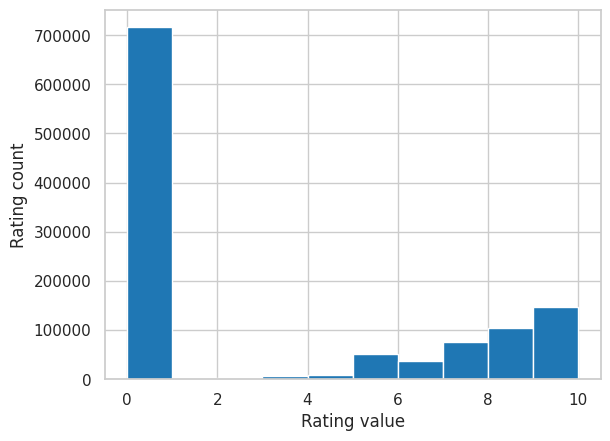

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("notebook")
sns.set_style("whitegrid")

ratings["Book-Rating"].hist()
plt.xlabel("Rating value")
plt.ylabel("Rating count")
plt.show()


Теперь посмотрим на таблицу `Books`.

In [18]:
books = pd.read_csv("Books.csv")
books.head()

<ipython-input-18-7dc4eb500039>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv("Books.csv")


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [19]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


- Есть немножко пропусков.
- Проверим уязвимую часть данных – года – на адекватность.

In [20]:
books["Year-Of-Publication"].value_counts().sort_values(ascending=True)[:10]

,count
Year-Of-Publication,
2037,1
2011,1
2038,1
1938,1
1906,1
1919,1
1926,1
1926,1
2008,1


Есть года, которые еще не наступили...

Проверим, есть ли строковые данные в столбце с годом (потому что `info()` назвал тип данных столбца `object`).

In [21]:
books[books["Year-Of-Publication"].map(str).str.match("[^0-9]")]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


В трех строках пропущен автор, из-за чего смещены данные. Автор либо пропущен, либо склеен с названием. Надо проверить.

В сводке написано, что часть авторов и издателей провущена. Проверим, так ли это.

In [22]:
books[(books["Book-Author"].isnull()) | (books["Publisher"].isnull())]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
118033,0751352497,A+ Quiz Masters:01 Earth,NaN,1999,Dorling Kindersley,http://images.amazon.com/images/P/0751352497.0...,http://images.amazon.com/images/P/0751352497.0...,http://images.amazon.com/images/P/0751352497.0...
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...


Да, это так. Основные проблемы с данными выявили. Пора их исправлять и приступать к созданию рекомендаций.

## План анализа данных

1. Обработать данные, т.к. в данных есть несколько небольших проблем:
  1. В паре строк в таблице `Books.scv` значения столбцов сдвинуты вправо, а еще есть года, которые еще не наступили.
  2. В нескольких строках в таблице `Books.scv` есть пропуски, а также для рекомендаций в рамках лабораторной не понадобятся ссылки на картинки с обложкой.
  3. Не будем использовать для обучения записи с рейтинг равным 0 из таблицы `Ratings.scv`. Считаем, что 0 означает, что пользователь еще не оценивал книгу, но проявил к ней какой-то интерес.
  4. Не будем использовать для обучения алгоритмов те книги, которым оценка поставлена всего 1 раз. Пользователей, оценивших всего одну книгу тоже брать в расчет не будем (хотя это на самом деле будет не сильно сказываться на обобщающей способности алгоритмов, можете сами проверить).
  5. Пункты 1-4 необходимы и достаточны для выполнения всех задач. Но можно сделать более глубокую обработку.
2. Обучить [SVD](https://surprise.readthedocs.io/en/stable/getting_started.html) на следующих записях: у книги есть хотя бы одна оценка, пользователь оценил хотя бы одну книгу.
   - МАЕ должно быть ниже 1.3 (для этого есть тест)
   - **Сохранить модель.**
3. Научить линейную регрессию ([SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html)) предсказывать средний рейтинг книги по следующим столбцам: автор, издатель, год издания, векторизованное название (для векторизации можно использовать [tf-idf](https://scikit-learn.org/stable/modules/feature_extraction.html#tfidf-term-weighting), [word2vec](https://radimrehurek.com/gensim/models/word2vec.html) или более сложный алгоритм. Для достижения требуемой тестом точности достаточно будет tf-idf. Собрав полностью датасет, не забудьте нормализовать данные ([StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)).
   - МАЕ должно быть ниже 1.5 (для этого есть тест)
   - **Сохранить модель.**
4. В файле `personal_recommendation.py` создайте рекомендацию для пользователя, у которого в исходном датасете было больше всего 0 среди рейтингов книг.
   Алгоритм такой:
   1. Находим нужного пользователя.
   2. Делаем предсказание SVD для книг, которым он "поставил" 0.
   3. Берем те книги, для которых предсказали рейтинг не ниже 8. Считаем, что 8 означет, что книга ему точно понравится.
   4. Делаем предсказание LinReg для этих же книг.
   5. Сортируем полученный на шаге 3 список по убыванию рейтинга линейной модели.
   6. В конце файла комментарием записываем полученную рекомендацию.

- То есть идея в том, чтобы сделать для пользователя индивидуальную рекомендацию, показывая в начале списка те книги, которые в целом могли бы иметь высокий рейтинг.
- Обязательно сохраняйте готовую модель и добавляйте ее в свой репозиторий, потому что файл с сохраненной моделью используется в тестах.

## Куда сдавать?

По инструкции в гитхаб – https://shy-question-39d.notion.site/1150ea832e418032bfc3d3e827c380fb?pvs=74

- К этой работе есть два теста – на качество получившихся моделей.
- Пул-реквест нужно сделать в ветку `lab2`.
- Можно загрузить в гитхаб файлы с реализацией по шаблону (шаблон можно дополнять и изменять под себя) или подготовить колаб с решением. Главное – сохранить модели, тесты проверяют их.

> Будьте внимательны! На гитхабе в ветке `main` обновился файл `pyad.yml`.

**Устная защита работ не требуется, но вам могут быть заданы вопросы прямо в вашем пул-реквесте!**

# Решение

## 1. Обработать данные, т.к. в данных есть несколько небольших проблем:

### 1. В паре строк в таблице Books.scv значения столбцов сдвинуты вправо, а еще есть года, которые еще не наступили.

Было обнаружено, что в трёх единственных строках, нуждающихся в сдвиге, автор был склеен с названием книги посредством символов \\\";

Для выполнения задания сначала эти строки были расклеены, после чего выполнен сдвиг.

In [23]:
import pandas as pd
import numpy as np

books["Year-Of-Publication"] = books["Year-Of-Publication"].astype(str)

shift_start_index = books.columns.get_loc("Book-Author")

def shift_row(row):
    if not row["Year-Of-Publication"].isdigit():
        print("До изменения:")
        print(row.to_string(), end="\n\n")

        row.iloc[shift_start_index + 1:] = row.iloc[shift_start_index:-1].values
        row.iloc[shift_start_index] = np.nan

        if "\\\";" in row["Book-Title"]:
            title_parts = row["Book-Title"].split('\\\";', 1)
            row["Book-Title"] = title_parts[0].strip()
            row["Book-Author"] = title_parts[1].strip(' "')

        print("После изменения:")
        print(row.to_string(), end="\n\n")
    return row

books = books.apply(shift_row, axis=1)

До изменения:
ISBN                                                          078946697X
Book-Title             DK Readers: Creating the X-Men, How It All Beg...
Book-Author                                                         2000
Year-Of-Publication                                    DK Publishing Inc
Publisher              http://images.amazon.com/images/P/078946697X.0...
Image-URL-S            http://images.amazon.com/images/P/078946697X.0...
Image-URL-M            http://images.amazon.com/images/P/078946697X.0...
Image-URL-L                                                          NaN

После изменения:
ISBN                                                          078946697X
Book-Title             DK Readers: Creating the X-Men, How It All Beg...
Book-Author                                           Michael Teitelbaum
Year-Of-Publication                                                 2000
Publisher                                              DK Publishing Inc
Image-URL-S        

In [24]:
len_history_books = [len(books)]
books = books[books["Year-Of-Publication"].astype(int) <= 2025]
len_history_books.append(len(books))
print(f"Было удалено строк с книгами из будущего: {len_history_books[-2] - len_history_books[-1]}")

Было удалено строк с книгами из будущего: 12


### 2. В нескольких строках в таблице Books.scv есть пропуски, а также для рекомендаций в рамках лабораторной не понадобятся ссылки на картинки с обложкой.

In [25]:
books.dropna(inplace=True)
len_history_books.append(len(books))
print(f"Было удалено строк с пропусками данных: {len_history_books[-2] - len_history_books[-1]}")

Было удалено строк с пропусками данных: 4


In [26]:
books.head(1)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...


In [27]:
books.drop(columns=[col for col in books.columns if col.startswith("Image-URL-")], inplace=True)

In [28]:
books.head(1)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press


### 3. Не будем использовать для обучения записи с рейтинг равным 0 из таблицы Ratings.scv. Считаем, что 0 означает, что пользователь еще не оценивал книгу, но проявил к ней какой-то интерес.

In [29]:
len_history_ratings = [len(ratings)]
ratings = ratings[ratings["Book-Rating"] != 0]
len_history_ratings.append(len(ratings))
print(f"Было удалено строк с нулевым рейтингом: {len_history_ratings[-2] - len_history_ratings[-1]}")

Было удалено строк с нулевым рейтингом: 716109


### 4. Не будем использовать для обучения алгоритмов те книги, которым оценка поставлена всего 1 раз. Пользователей, оценивших всего одну книгу тоже брать в расчет не будем (хотя это на самом деле будет не сильно сказываться на обобщающей способности алгоритмов, можете сами проверить).

In [30]:
ratings = ratings.groupby("ISBN").filter(lambda x: len(x) > 1)

books = books[books["ISBN"].isin(ratings["ISBN"])]
len_history_books.append(len(books))
print(f"Было удалено строк с книгами с единственной оценкой: {len_history_books[-2] - len_history_books[-1]}")

Было удалено строк с книгами с единственной оценкой: 220927


In [31]:
ratings = ratings.groupby("User-ID").filter(lambda x: len(x) > 1)
len_history_ratings.append(len(ratings))
print(f"Было удалено строк с пользователями с единственной оценкой: {len_history_ratings[-2] - len_history_ratings[-1]}")

Было удалено строк с пользователями с единственной оценкой: 167269


In [32]:
books.info()
ratings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50417 entries, 1 to 270899
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ISBN                 50417 non-null  object
 1   Book-Title           50417 non-null  object
 2   Book-Author          50417 non-null  object
 3   Year-Of-Publication  50417 non-null  object
 4   Publisher            50417 non-null  object
dtypes: object(5)
memory usage: 2.3+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 266402 entries, 16 to 1149775
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   User-ID      266402 non-null  int64 
 1   ISBN         266402 non-null  object
 2   Book-Rating  266402 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 8.1+ MB


## 2. Обучить SVD на следующих записях: у книги есть хотя бы одна оценка, пользователь оценил хотя бы одну книгу.
*   МАЕ должно быть ниже 1.3 (для этого есть тест)
*   Сохранить модель.

In [33]:
!pip install scikit-surprise

In [34]:
from surprise import accuracy, Dataset, SVD, Reader
from surprise.model_selection import train_test_split
import pickle

In [35]:
reader = Reader(rating_scale=(0, 11))
data = Dataset.load_from_df(ratings[["User-ID", "ISBN", "Book-Rating"]], reader)

trainset, testset = train_test_split(data)

model = SVD()
model.fit(trainset)

predictions = model.test(testset)
mae = accuracy.mae(predictions)

with open("svd.pkl", "wb") as file:
    pickle.dump(model, file)

MAE:  1.2449


## 3. Научить линейную регрессию (SGDRegressor) предсказывать средний рейтинг книги по следующим столбцам: автор, издатель, год издания, векторизованное название (для векторизации можно использовать tf-idf, word2vec или более сложный алгоритм. Для достижения требуемой тестом точности достаточно будет tf-idf. Собрав полностью датасет, не забудьте нормализовать данные (StandardScaler).

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_absolute_error
from scipy.sparse import hstack

In [37]:
average_ratings = ratings.groupby("ISBN")["Book-Rating"].mean().reset_index()
average_ratings.rename(columns={"Book-Rating": "Average-Rating"}, inplace=True)

df = pd.merge(books, average_ratings, on="ISBN", how="left").dropna(subset=["Average-Rating"])

vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
title = vectorizer.fit_transform(df["Book-Title"])

author_encoder = LabelEncoder()
publisher_encoder = LabelEncoder()
year_scaler = StandardScaler()
author_scaler = StandardScaler()
publisher_scaler = StandardScaler()

author = author_encoder.fit_transform(df["Book-Author"]).reshape(-1, 1)
publisher = publisher_encoder.fit_transform(df["Publisher"]).reshape(-1, 1)
year = year_scaler.fit_transform(df[["Year-Of-Publication"]])
author = author_scaler.fit_transform(author)
publisher = publisher_scaler.fit_transform(publisher)

X = hstack([title, author, publisher, year])

y_scaler = StandardScaler()
y = y_scaler.fit_transform(df["Average-Rating"].values.reshape(-1, 1))

X_train, X_test, y_train, y_test = train_test_split(X, y)

linreg = SGDRegressor(max_iter=1000, tol=1e-5)
linreg.fit(X_train, y_train.ravel())

y_pred = linreg.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)

print(f"MAE:  {mae:.4f}")

with open("linreg.pkl", "wb") as file:
    pickle.dump(model, file)

with open("y_scaler.pkl", "wb") as file:
    pickle.dump(y_scaler, file)

with open("year_scaler.pkl", "wb") as file:
    pickle.dump(year_scaler, file)

with open("author_scaler.pkl", "wb") as file:
    pickle.dump(author_scaler, file)

with open("publisher_scaler.pkl", "wb") as file:
    pickle.dump(publisher_scaler, file)

with open("vectorizer.pkl", "wb") as file:
    pickle.dump(vectorizer, file)

with open("author_encoder.pkl", "wb") as file:
    pickle.dump(author_encoder, file)

with open("publisher_encoder.pkl", "wb") as file:
    pickle.dump(publisher_encoder, file)

MAE:  0.7628


## 4. В файле personal_recommendation.py создайте рекомендацию для пользователя, у которого в исходном датасете было больше всего 0 среди рейтингов книг. Алгоритм такой:

### 0. Загружаем библиотеки и модели, обрабатываем книги.

In [38]:
import pandas as pd
import pickle
from surprise import Dataset, Reader, SVD
from sklearn.linear_model import SGDRegressor
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy.sparse import hstack
import numpy as np

ratings = pd.read_csv("Ratings.csv")
books = pd.read_csv("Books.csv")

with open("svd.pkl", "rb") as file:
    svd = pickle.load(file)

with open("linreg.pkl", "rb") as file:
    linreg = pickle.load(file)

with open("vectorizer.pkl", "rb") as file:
    vectorizer = pickle.load(file)

with open("author_encoder.pkl", "rb") as file:
    author_encoder = pickle.load(file)

with open("publisher_encoder.pkl", "rb") as file:
    publisher_encoder = pickle.load(file)

with open("year_scaler.pkl", "rb") as file:
    year_scaler = pickle.load(file)

books["Year-Of-Publication"] = books["Year-Of-Publication"].astype(str)

shift_start_index = books.columns.get_loc("Book-Author")

def shift_row(row):
    if not row["Year-Of-Publication"].isdigit():

        row.iloc[shift_start_index + 1:] = row.iloc[shift_start_index:-1].values
        row.iloc[shift_start_index] = np.nan

        if "\\\";" in row["Book-Title"]:
            title_parts = row["Book-Title"].split('\\\";', 1)
            row["Book-Title"] = title_parts[0].strip()
            row["Book-Author"] = title_parts[1].strip(' "')
    return row

books = books.apply(shift_row, axis=1)
books = books[books["Year-Of-Publication"].astype(int) <= 2025]
books.dropna(inplace=True)
books.drop(columns=[col for col in books.columns if col.startswith("Image-URL-")], inplace=True)

<ipython-input-38-a1e2fd2d30ec>:11: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv("Books.csv")


### 1. Находим нужного пользователя.

In [39]:
user_with_most_zeros = ratings[ratings["Book-Rating"] == 0]["User-ID"].value_counts().idxmax()

### 2. Делаем предсказание SVD для книг, которым он "поставил" 0.

In [40]:
zero_rated_books = ratings[(ratings["User-ID"] == user_with_most_zeros) & (ratings["Book-Rating"] == 0)]["ISBN"].unique()

### 3. Берем те книги, для которых предсказали рейтинг не ниже 8. Считаем, что 8 означет, что книга ему точно понравится.

In [41]:
def predict_rating(isbn):
    return svd.predict(user_with_most_zeros, isbn).est

unread_books = books[~books["ISBN"].isin(
    ratings[ratings["User-ID"] == user_with_most_zeros]["ISBN"]
)].copy()

unread_books["Predicted-Rating"] = unread_books["ISBN"].map(predict_rating)

best_books = unread_books[unread_books["Predicted-Rating"] >= 8].copy()

### 4. Делаем предсказание LinReg для этих же книг.

In [42]:
title = vectorizer.transform(best_books["Book-Title"])
author = author_encoder.transform(best_books["Book-Author"]).reshape(-1, 1)
publisher = publisher_encoder.transform(best_books["Publisher"]).reshape(-1, 1)
year = year_scaler.transform(best_books[["Year-Of-Publication"]])

X = hstack([title, author, publisher, year])

best_books["Predicted-Rating"] = linreg.predict(X)

### 5. Сортируем полученный на шаге 3 список по убыванию рейтинга линейной модели.

In [43]:
best_books.sort_values(by="Predicted-Rating", ascending=False, inplace=True)

### 6. В конце файла комментарием записываем полученную рекомендацию.

In [44]:
with open("best_books.txt", "w") as file:
    for index, row in best_books.iterrows():
        file.write(f"{row['Book-Title']} - Prediction: {row['Predicted-Rating']:.2f}\n")

In [45]:
with open("best_books.txt", "r") as best_books:
    for _ in range(5):
        print(best_books.readline().strip())

The Hobbit : The Enchanting Prelude to The Lord of the Rings - Prediction: 9.30
The Indian in the Cupboard (rack) (Indian in the Cupboard) - Prediction: 9.01
On the Banks of Plum Creek - Prediction: 8.29
Hop on Pop (I Can Read It All by Myself Beginner Books) - Prediction: 8.20
The Hunt for Red October - Prediction: 8.17


### Идея

То есть идея в том, чтобы сделать для пользователя индивидуальную рекомендацию, показывая в начале списка те книги, которые в целом могли бы иметь высокий рейтинг.

Обязательно сохраняйте готовую модель и добавляйте ее в свой репозиторий, потому что файл с сохраненной моделью используется в тестах.